In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [173]:
train = pd.read_csv("data/train.csv", delimiter=",")
test = pd.read_csv("data/test.csv", delimiter=",")

In [174]:
train_data = np.array(train, dtype = 'float32')
X_test = np.array(test, dtype='float32')

In [175]:
X_train = train_data[:,1:]/255

y_train = train_data[:,0]

In [176]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [177]:
X_train.shape

(42000, 784)

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2,random_state = 713)

In [179]:
# plt.figure(figsize=(10, 10))
# for i in range(36):
#     plt.subplot(6, 6, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i].reshape((28,28)))
#     label_index = int(y_train[i])
# plt.show()

In [180]:
image_shape = (28,28,1) 

In [181]:
X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = X_test.reshape(X_test.shape[0],*image_shape)

In [182]:
X_train.shape

(33600, 28, 28, 1)

In [183]:
# initializer = GlorotNormal()

model = keras.Sequential([
    #base
    layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=image_shape),
    #heatete
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [184]:
history = model.fit(
    X_train, y_train,
    batch_size=512,
    validation_split=0.33,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    epochs=50,
    verbose=1
)

Epoch 1/50
66/66 [==============================] - 7s 98ms/step - loss: 0.5996 - accuracy: 0.8239 - val_loss: 0.2466 - val_accuracy: 0.9296
Epoch 2/50
66/66 [==============================] - 6s 93ms/step - loss: 0.1942 - accuracy: 0.9451 - val_loss: 0.1567 - val_accuracy: 0.9567
Epoch 3/50
66/66 [==============================] - 6s 87ms/step - loss: 0.1268 - accuracy: 0.9648 - val_loss: 0.1214 - val_accuracy: 0.9645
Epoch 4/50
66/66 [==============================] - 6s 93ms/step - loss: 0.0931 - accuracy: 0.9746 - val_loss: 0.0984 - val_accuracy: 0.9718
Epoch 5/50
66/66 [==============================] - 7s 100ms/step - loss: 0.0713 - accuracy: 0.9806 - val_loss: 0.0881 - val_accuracy: 0.9737
Epoch 6/50
66/66 [==============================] - 6s 90ms/step - loss: 0.0597 - accuracy: 0.9832 - val_loss: 0.0838 - val_accuracy: 0.9742
Epoch 7/50
66/66 [==============================] - 6s 88ms/step - loss: 0.0482 - accuracy: 0.9866 - val_loss: 0.0754 - val_accuracy: 0.9786
Epoch 8/50
6

In [185]:
history_df = pd.DataFrame(history.history)

In [186]:
test_loss, test_acc = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
confusion = confusion_matrix(y_test, y_pred_classes)
print(classification_report(y_test, y_pred_classes))

263/263 [==============================] - 1s 5ms/step


'              precision    recall  f1-score   support\n\n         0.0       0.98      0.99      0.98       816\n         1.0       0.99      0.99      0.99       942\n         2.0       0.98      0.97      0.98       880\n         3.0       0.98      0.98      0.98       846\n         4.0       0.98      0.99      0.98       795\n         5.0       0.99      0.95      0.97       778\n         6.0       0.99      0.99      0.99       813\n         7.0       0.99      0.97      0.98       876\n         8.0       0.96      0.97      0.96       796\n         9.0       0.97      0.98      0.97       858\n\n    accuracy                           0.98      8400\n   macro avg       0.98      0.98      0.98      8400\nweighted avg       0.98      0.98      0.98      8400\n'

Text(0.5, 1.0, 'Train - Accuracy')

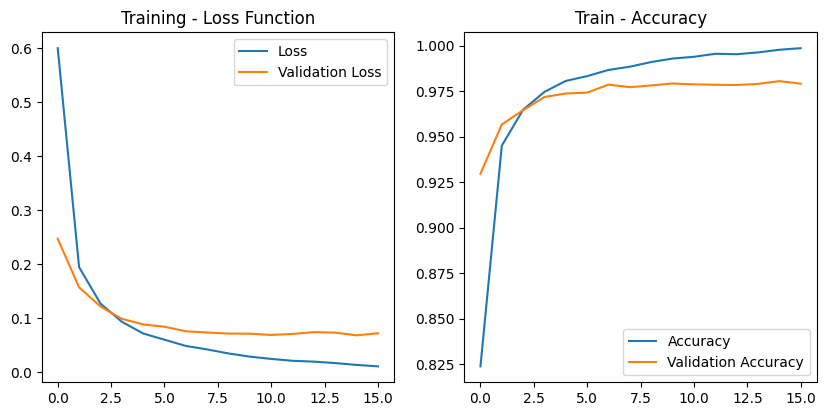

In [187]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [188]:
model.save('modail.h5')

In [189]:
#new_model = tf.keras.models.load_model('modail.h5')

# new_model.summary()

parti streamlit

In [259]:
import cv2

img = cv2.imread("test.png",cv2.IMREAD_GRAYSCALE)

In [260]:
resized = cv2.resize(img, (28,28)).astype('float32').reshape(1,28,28,1)/255

In [261]:
y_pred = new_model.predict(resized)

1/1 [==============================] - 0s 24ms/step


In [262]:
np.round(y_pred,3)*100

array([[ 0. ,  0. , 99.9,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]],
      dtype=float32)

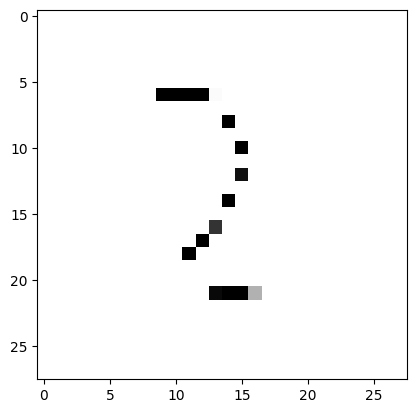

In [226]:
plt.imshow(resized[0],cmap='gray')